# TensorFlow Tutorial  

Copyright 2018 weiliang

## 1、MNIST数据  
[MNIST 数据集](http://yann.lecun.com/exdb/mnist/)是手写数字库

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


[WARNING](https://github.com/tensorflow/tensorflow/issues/18111)

In [2]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

#### 可视化数据

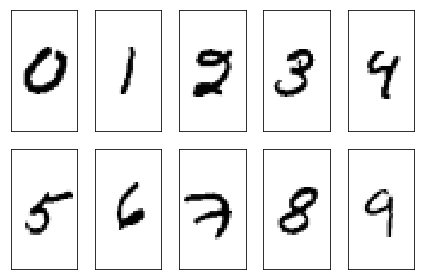

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=5,sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train[:,i]==1][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys',interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## 2、搭建网络

In [4]:
x = tf.placeholder(tf.float32,[None,784]) # 28x28
y = tf.placeholder(tf.float32,[None,10])  # 0-9 共10类

调用**tf.layers.dense**函数搭建一个最简单的全连接神经网络，只包含输入层（784个特征）和输出层（10个特征）,使用**softmax**作为激活函数  

网络结构如下图：  
![avatar](./image/mnist-fc.png)

In [5]:
prediction = tf.layers.dense(x, 10, activation=tf.nn.softmax)

## 3、Loss(损失函数)
即需要最优化的目标函数，用来度量真实值和预测值之间的距离

交叉熵（Cross_Entropy）:
$$H(p,q) = -\sum_{x}p(x)logq(x)$$

In [6]:
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction),reduction_indices=[1]))
loss = tf.losses.softmax_cross_entropy(onehot_labels=y, logits=prediction)

## 4、训练
采用梯度下降法训练

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
accuracy = tf.metrics.accuracy(labels=tf.argmax(y,axis=1),predictions=tf.argmax(prediction,axis=1),)[1]
sess = tf.Session()
# init = tf.global_variables_initializer()
init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init)

for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(128) # batch_size = 128
    sess.run(train_step, feed_dict={x:batch_x, y:batch_y})
    if step % 50 == 0:
        acc_test = sess.run(accuracy,{x:x_test, y:y_test})
        print('step:',step, '|test acc:%.4f' % acc_test)

step: 0 |test acc:0.1407
step: 50 |test acc:0.4530
step: 100 |test acc:0.5698
step: 150 |test acc:0.6381
step: 200 |test acc:0.6830
step: 250 |test acc:0.7159
step: 300 |test acc:0.7400
step: 350 |test acc:0.7589
step: 400 |test acc:0.7741
step: 450 |test acc:0.7862
step: 500 |test acc:0.7962
step: 550 |test acc:0.8047
step: 600 |test acc:0.8119
step: 650 |test acc:0.8182
step: 700 |test acc:0.8239
step: 750 |test acc:0.8288
step: 800 |test acc:0.8333
step: 850 |test acc:0.8372
step: 900 |test acc:0.8408
step: 950 |test acc:0.8442


[tensorflow api](http://docs.w3cub.com/tensorflow~python/)